In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [23]:
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
logging.getLogger('tensorflow').setLevel(logging.ERROR)

## Creating data to view and fit

In [2]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

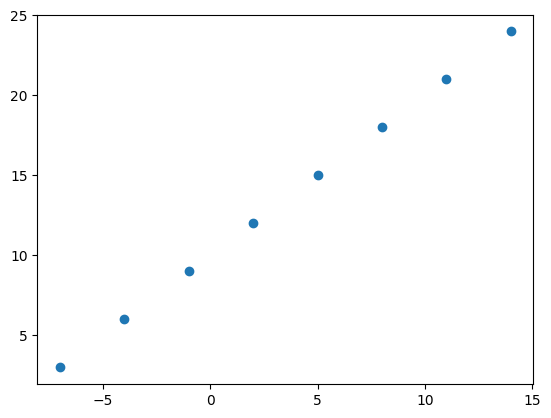

In [3]:
# Visualize
plt.scatter(X, Y)

In [4]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
# Turn numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modeling with tensorflow

1. Creating a model: Define input and output laters as well as the hidden layers
2. Compiling a model: Define loss function,  optimizer (how to improve the learning) and evaluation metrics.
3. Fitting a model: Find the patterns.

In [6]:
# Set random seed
tf.random.set_seed(42)

In [8]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,      # MAE: Mean absolote error
             optimizer=tf.keras.optimizers.SGD(), # SGD: Stochastic gradient descent
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 12.8154 - mae: 12.8154
Epoch 2/5
1/1 [==============================] - 0s 32ms/step - loss: 12.6829 - mae: 12.6829
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 12.5504 - mae: 12.5504
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 12.4179 - mae: 12.4179
Epoch 5/5
1/1 [==============================] - 0s 29ms/step - loss: 12.2854 - mae: 12.2854


In [9]:
# Check prediction
model.predict([17.0])

1/1 [==============================] - 0s 498ms/step


array([[6.349963]], dtype=float32)

## Improve the model

1. Create a model: Add more layers, increase the number of hidden units (neurons) within layers, change activation function of each layer.
2. Compile the model: Change optimization, change the learning rate of optimization function.
3. Fit the model: Change epochs (look at the data more times). Feed more data to train.

In [10]:
# Rebuild the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 969ms/step - loss: 19.9724 - mae: 19.9724
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 19.6912 - mae: 19.6912
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 19.4099 - mae: 19.4099
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 19.1287 - mae: 19.1287
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 18.8474 - mae: 18.8474
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 18.5662 - mae: 18.5662
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 18.2849 - mae: 18.2849
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 18.0037 - mae: 18.0037
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 17.7224 - mae: 17.7224
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 17.4412 - mae: 17.4412
Epoch 11/100
1/1 [==============================

1/1 [==============================] - 0s 16ms/step - loss: 6.9056 - mae: 6.9056
Epoch 88/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9000 - mae: 6.9000
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8944 - mae: 6.8944
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8888 - mae: 6.8888
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8831 - mae: 6.8831
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8775 - mae: 6.8775
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8719 - mae: 6.8719
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8663 - mae: 6.8663
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8606 - mae: 6.8606
Epoch 96/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8550 - mae: 6.8550
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 313ms/step


array([[29.573175]], dtype=float32)

In [39]:
# Trying another change: Extra layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.2834 - mae: 12.2834
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2155 - mae: 12.2155
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 12.1476 - mae: 12.1476
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0798 - mae: 12.0798
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 12.0119 - mae: 12.0119
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 11.9440 - mae: 11.9440
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8762 - mae: 11.8762
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 11.8083 - mae: 11.8083
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 11.7404 - mae: 11.7404
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 11.6724 - mae: 11.6724
Epoch 11/100
1/1 [==============================] -

1/1 [==============================] - 0s 16ms/step - loss: 6.7961 - mae: 6.7961
Epoch 88/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8036 - mae: 6.8036
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8088 - mae: 6.8088
Epoch 90/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8081 - mae: 6.8081
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8020 - mae: 6.8020
Epoch 92/100
1/1 [==============================] - 0s 16ms/step - loss: 6.7910 - mae: 6.7910
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 6.7757 - mae: 6.7757
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 6.7565 - mae: 6.7565
Epoch 95/100
1/1 [==============================] - 0s 16ms/step - loss: 6.7386 - mae: 6.7386
Epoch 96/100
1/1 [==============================] - 0s 31ms/step - loss: 6.7324 - mae: 6.7324
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 

In [40]:
# Might be overfitting, since the metrics is better, but the predicion deviates more than the previous test 
model.predict([17.0])

1/1 [==============================] - 0s 313ms/step


array([[31.452871]], dtype=float32)